# Business Problem : 
A mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Import Libraries

In [103]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Suppress Warning

In [104]:
import warnings
warnings.filterwarnings("ignore")

# 1. Import Data Set

In [105]:
dataset = df_Short = customer_data = pd.read_csv('Mall_Customers.csv')

In [106]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [108]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


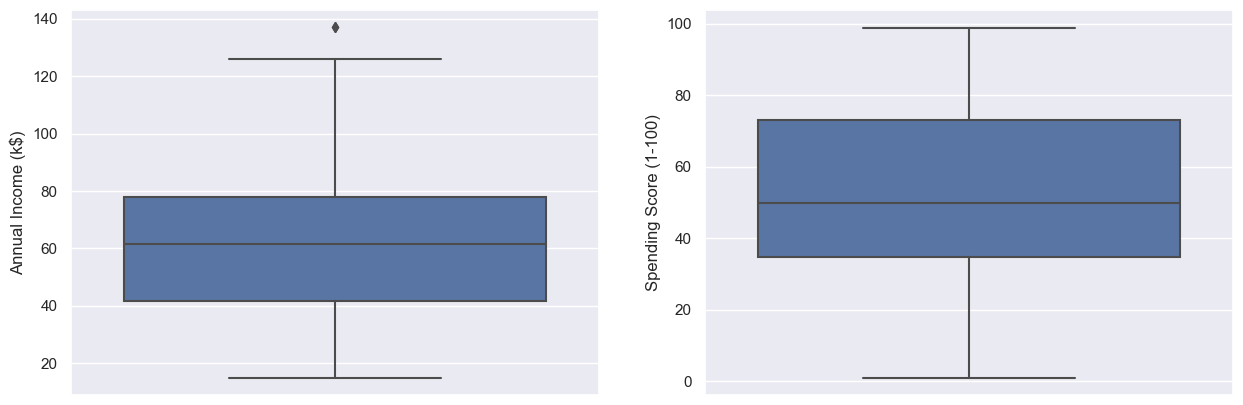

In [110]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

# Conclusion -
Data doesn't contain any outliers

# 3. EDA : Exploratory Data Analysis
3.1 Univariate Analysis - Numerical Data Type

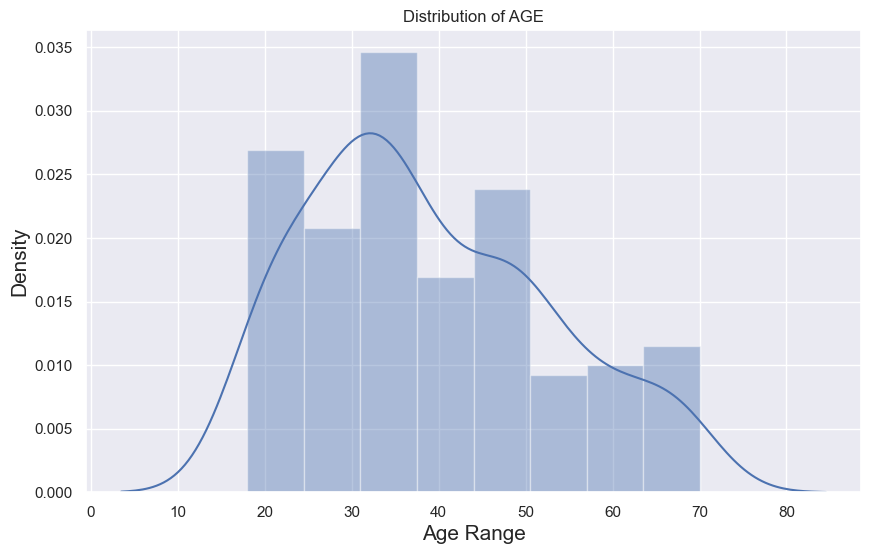

In [111]:
# Checking Age Distribution

plt.figure(figsize=(10,6))

sns.distplot(df.Age)
plt.title("Distribution of AGE")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

# Conclusion - 
There are customers of wide variety of ages

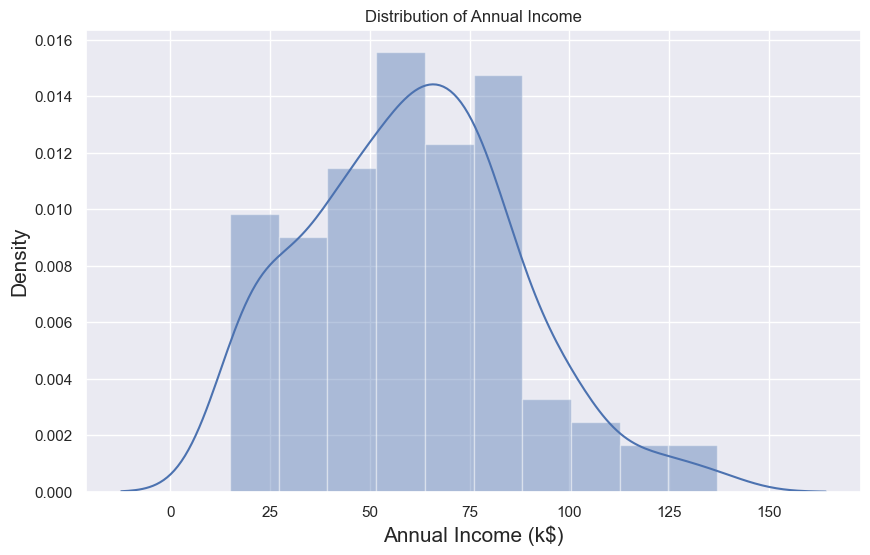

In [112]:
# Annual Income (k$) Distribution

plt.figure(figsize=(10,6))

sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()


# Conclusion - 
Most of the annual income falls between 50K to 85K.

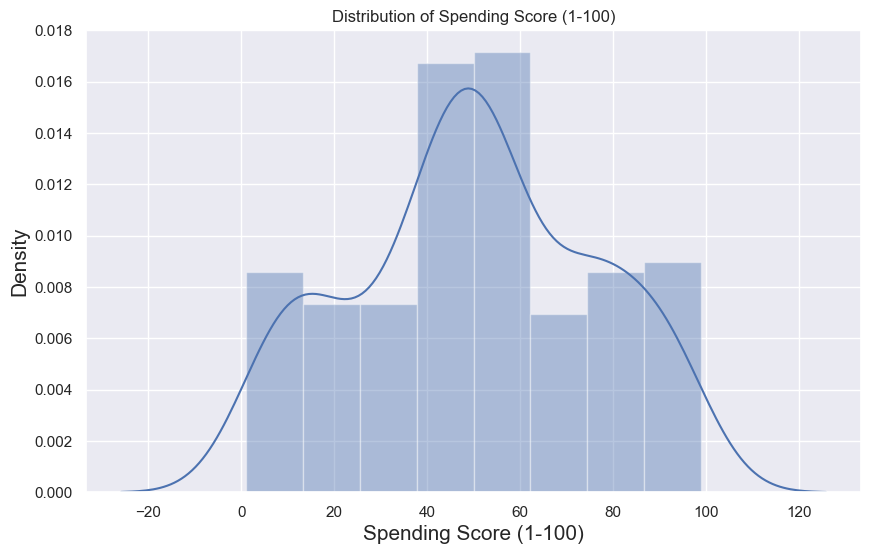

In [113]:
# Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))

sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

# Conclusion -
Most of the customers got the score ranging between 40 to 60

3.2 Univariate Analysis - Categorical Data Type

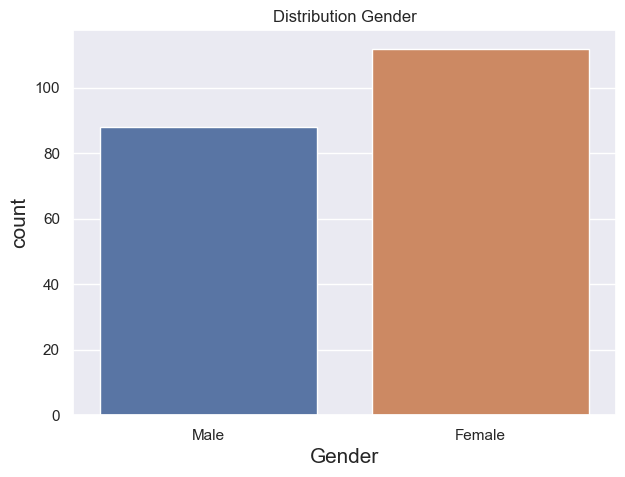

In [114]:
plt.figure(figsize=(7,5))

plt.title("Distribution Gender")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender)
plt.show()

# Conclusion - 
Female customers are more as compared to the male customers

3.3 Bivariate Analysis - Numerical-Numerical Data Type



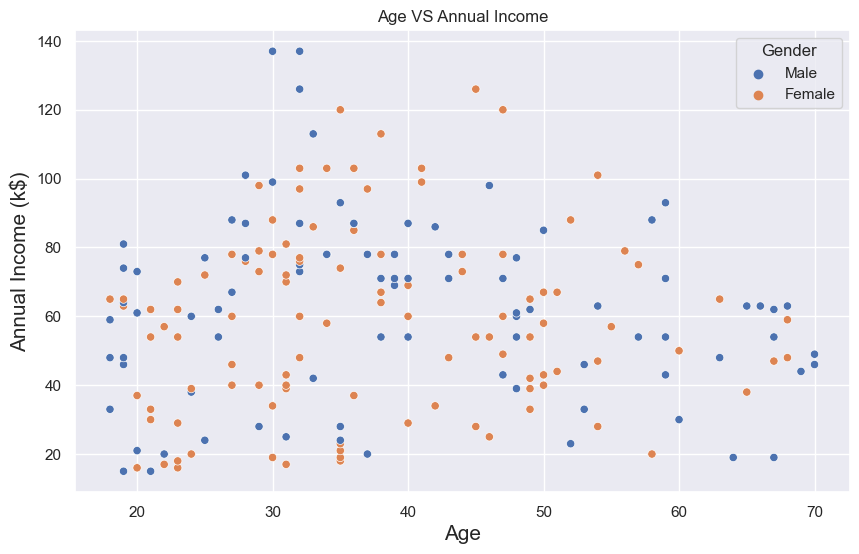

In [115]:
# Age VS Anual Income

plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)",hue="Gender")
plt.title("Age VS Annual Income")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

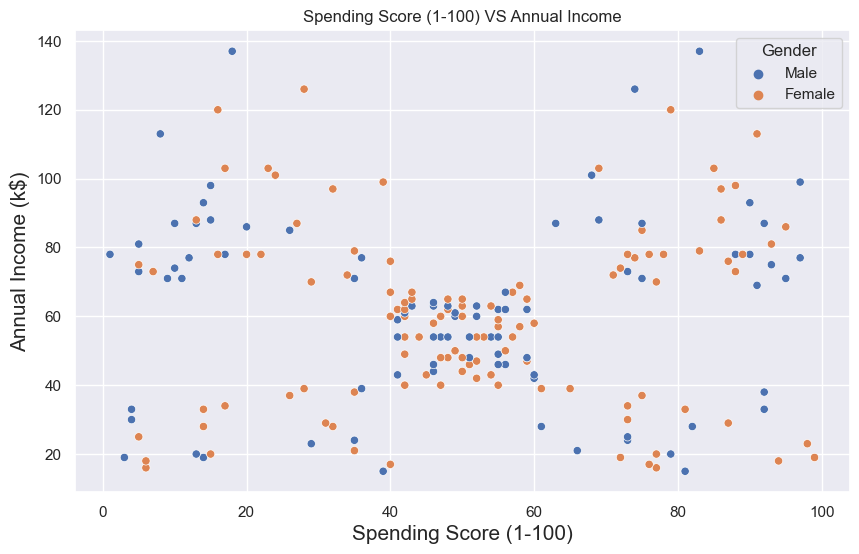

In [116]:
# Age VS Anual Income

plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender")
plt.title("Spending Score (1-100) VS Annual Income")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

<AxesSubplot:>

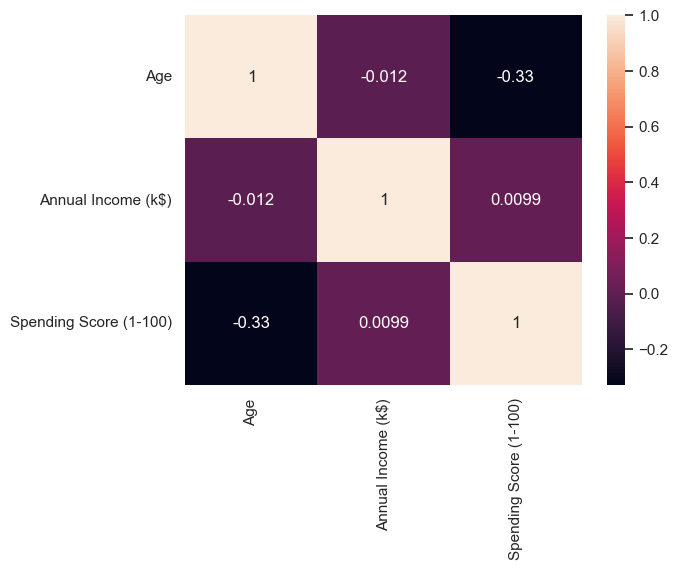

In [117]:
sns.heatmap(data = df.corr(), annot = True)

# Conclusion:
Heatmap is showing that spending score and annual income have a potive realtion between them.

In [118]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We actually do not know the number of clusters. There are several methods to select k that depends on the domain knowledge and rule of thumbs. Elbow method is one of the robust one used to find out the optimal number of clusters. In this method, the sum of distances of observations from their cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS). This is computed as

Yi is centroid for observation Xi. The below code performs this method.

In [126]:

#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
# finding wcss value for different number of clusters

wcss = []


for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

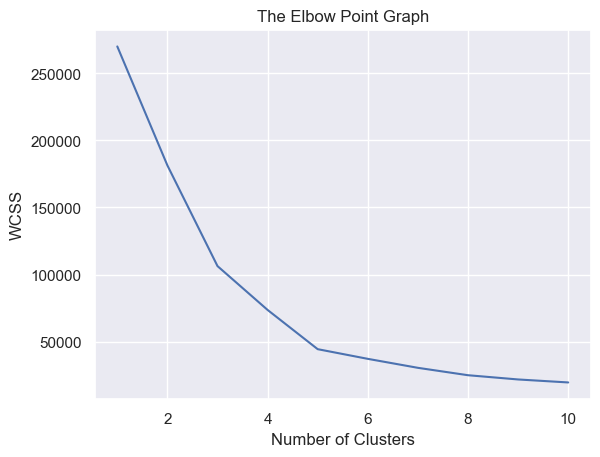

In [133]:
# plot an elbow graph
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

K is a hyperparameter in KMeans algorithm.

WCSS : Within Cluster Sum of Squares, in other word it's sum of squared distance between each point and the centroid in a cluster

Lower WCSS shows a better clustering(because points in a cluster are more similar to each other, this is what we want)

Increasing the k value always results in a lower WCSS.

if we put k to be equal to the number of samples(so each point is a special cluster) then WCSS = 0 , but this is not a wise way.

Here we will use elbow plot to find the best k.

Elbow point will show the best k.

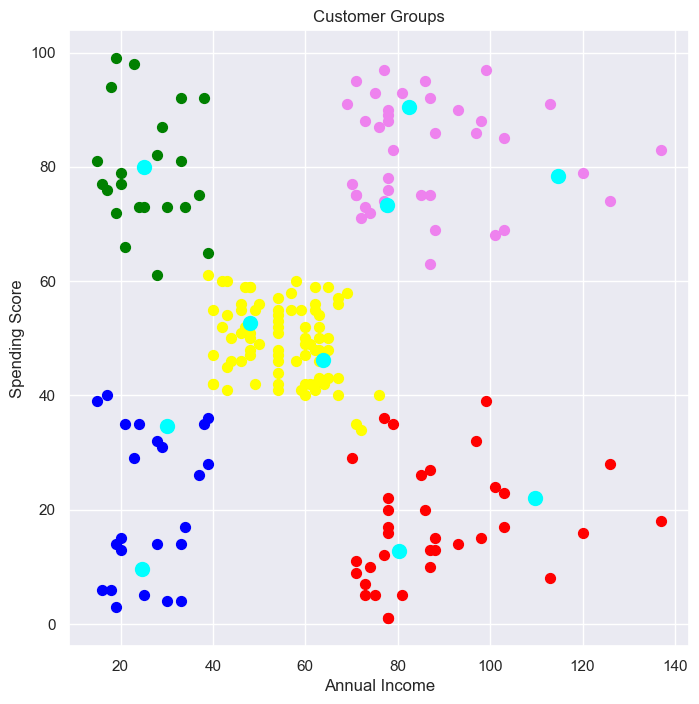

In [135]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Model Interpretation 
Cluster 1 (Green Color) -> Earning high but spending less

Cluster 2 (Red Color) -> Average in terms of earning and spending 

Cluster 3 (Yellow Color) -> Earning high and also spending high [TARGET SET]

Cluster 4 (Pink Color) -> Earning less but spending more

Cluster 5 (Blue Color) -> Earning less and also spending less





#  Final Conclusion:
We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse werein others we can set like once in a week or once in a month